## HealthCare  Capstone Project

#### Importing Required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

##### Importing Required Dataset 

In [3]:
df = pd.read_csv('health care diabetes.csv')

##### Getting shape of the dataset

In [4]:
df.shape

(768, 9)

##### Getting info about datatype

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Checking top and bottom records

In [6]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [7]:
df.tail(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


##### Checking null values in dataset

In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

##### No null values in dataset

##### Values = 0 in feature columns (except pregnancies) means that value is missing and should be treated as null values

### Checking '0' values in various columns wth Visualization

In [8]:
(df.Glucose==0).sum()

5

5 values are 0 in Glucose column

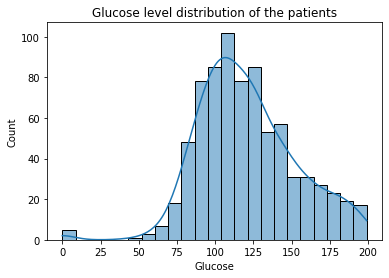

<Figure size 432x288 with 0 Axes>

In [9]:
#Glucose
sns.histplot(data=df.Glucose,kde=True) 
plt.title('Glucose level distribution of the patients')
plt.show()
plt.savefig('Glucose.png')

Checking '0' values in BloodPressure columns

In [10]:
(df.BloodPressure==0).sum()

35

35 values are 0 in BloodPressure column

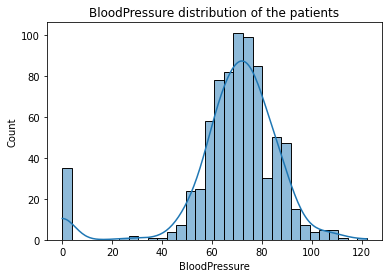

<Figure size 432x288 with 0 Axes>

In [11]:
#BloodPressure 
sns.histplot(data=df.BloodPressure,kde=True) 
plt.title('BloodPressure distribution of the patients')
plt.show()
plt.savefig('BloodPressure.png')

Checking '0' values in SkinThickness column

In [12]:
(df.SkinThickness==0).sum()

227

227 values are 0 in SkinThickness column

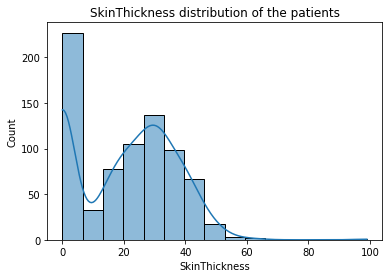

<Figure size 432x288 with 0 Axes>

In [13]:
#SkinThickness
sns.histplot(data=df.SkinThickness,kde=True) 
plt.title('SkinThickness distribution of the patients')
plt.show()
plt.savefig('SkinThickness.png')

Checking '0' values in Insulin column

In [14]:
(df.Insulin==0).sum()

374

374 values are 0 in Insulin column

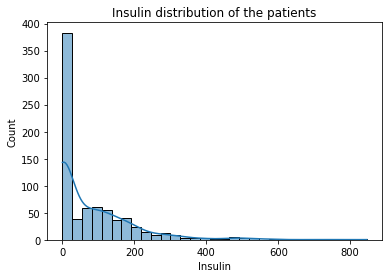

<Figure size 432x288 with 0 Axes>

In [15]:
#Insulin
sns.histplot(data=df.Insulin,kde=True) 
plt.title('Insulin distribution of the patients')
plt.show()
plt.savefig('Insulin.png')

Checking '0' values in Insulin column

In [16]:
(df.BMI==0).sum()

11

11 values are 0 in Insulin column

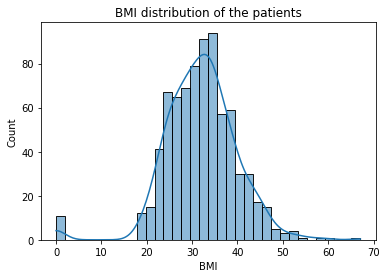

<Figure size 432x288 with 0 Axes>

In [17]:
#BMI
sns.histplot(data=df.BMI,kde=True) 
plt.title('BMI distribution of the patients')
plt.show()
plt.savefig('BMI.png')

### Checking outliers present in dataset

<AxesSubplot: >

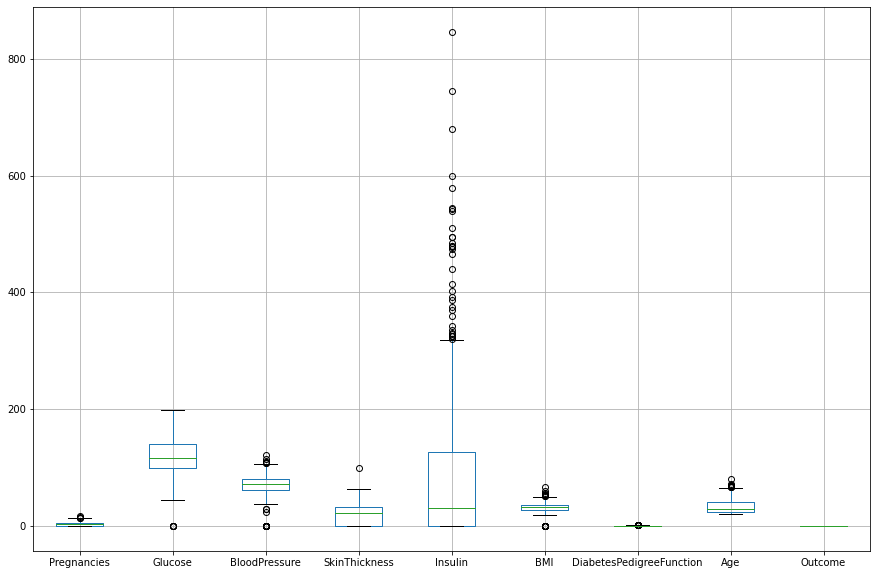

In [18]:
df.boxplot(figsize=(15,10))

Insulin having huge outlier present as '0' which is missing values

### Treating missing values 

##### Importing simple imputer to replace 0 with the median of column

In [19]:
from sklearn.impute import SimpleImputer
impute=SimpleImputer(missing_values=0,strategy='median') #0 is treated as the missing value

##### Creating new dataframe with imputed values

In [20]:
imputed=pd.DataFrame(impute.fit_transform(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]),columns=('Glucose','BloodPressure','SkinThickness','Insulin','BMI'))
imputed

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,125.0,33.6
1,85.0,66.0,29.0,125.0,26.6
2,183.0,64.0,29.0,125.0,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,125.0,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,29.0,125.0,30.1


#### comparing imputed and original data with histplot

<AxesSubplot: xlabel='Glucose', ylabel='Count'>

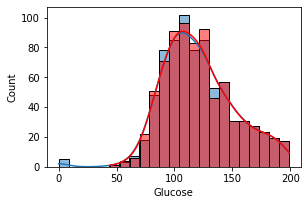

In [21]:
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.histplot(data=df.Glucose,kde=True)
plt.subplot(321)
sns.histplot(data=imputed.Glucose,color='r',kde=True)


<AxesSubplot: xlabel='BloodPressure', ylabel='Count'>

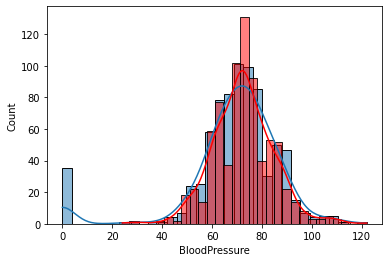

In [22]:
sns.histplot(data=df.BloodPressure,kde=True)
sns.histplot(data=imputed.BloodPressure,color='r',kde=True)

<AxesSubplot: xlabel='SkinThickness', ylabel='Count'>

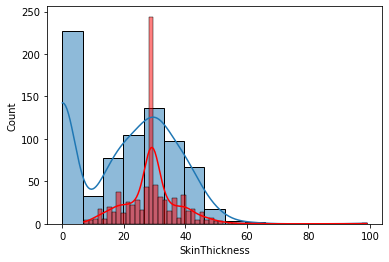

In [23]:
sns.histplot(data=df.SkinThickness,kde=True)
sns.histplot(data=imputed.SkinThickness,color='r',kde=True)

<AxesSubplot: xlabel='Insulin', ylabel='Count'>

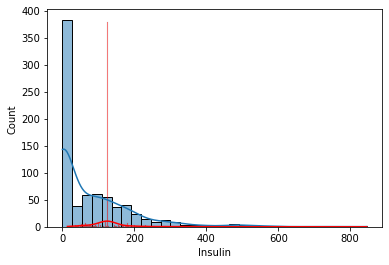

In [24]:
sns.histplot(data=df.Insulin,kde=True)
sns.histplot(data=imputed.Insulin,color='r',kde=True)

<AxesSubplot: xlabel='BMI', ylabel='Count'>

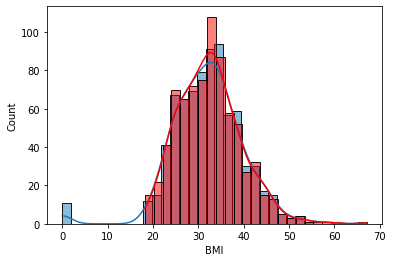

In [25]:
sns.histplot(data=df.BMI,kde=True)
sns.histplot(data=imputed.BMI,color='r',kde=True)

In [26]:
df.Glucose=imputed.Glucose
df.BloodPressure=imputed.BloodPressure
df.SkinThickness=imputed.SkinThickness
df.Insulin=imputed.Insulin
df.BMI=imputed.BMI

In [27]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [28]:
df[df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']]==0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Now, no null values are present

#### Checking for any duplicate values in data

In [29]:
df[df.duplicated()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### Ploting count frequency plot for describing the data types and the count of variables

In [31]:
df.dtypes.value_counts()

float64    6
int64      3
dtype: int64

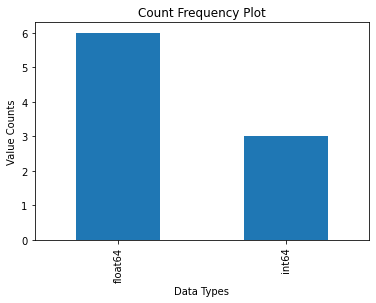

In [32]:
df1=df.dtypes.value_counts()
df1.plot.bar()
plt.title('Count Frequency Plot')
plt.xlabel('Data Types')
plt.ylabel('Value Counts')
plt.show()

#### Plotting countplot to show count of variables

<AxesSubplot: xlabel='Outcome', ylabel='count'>

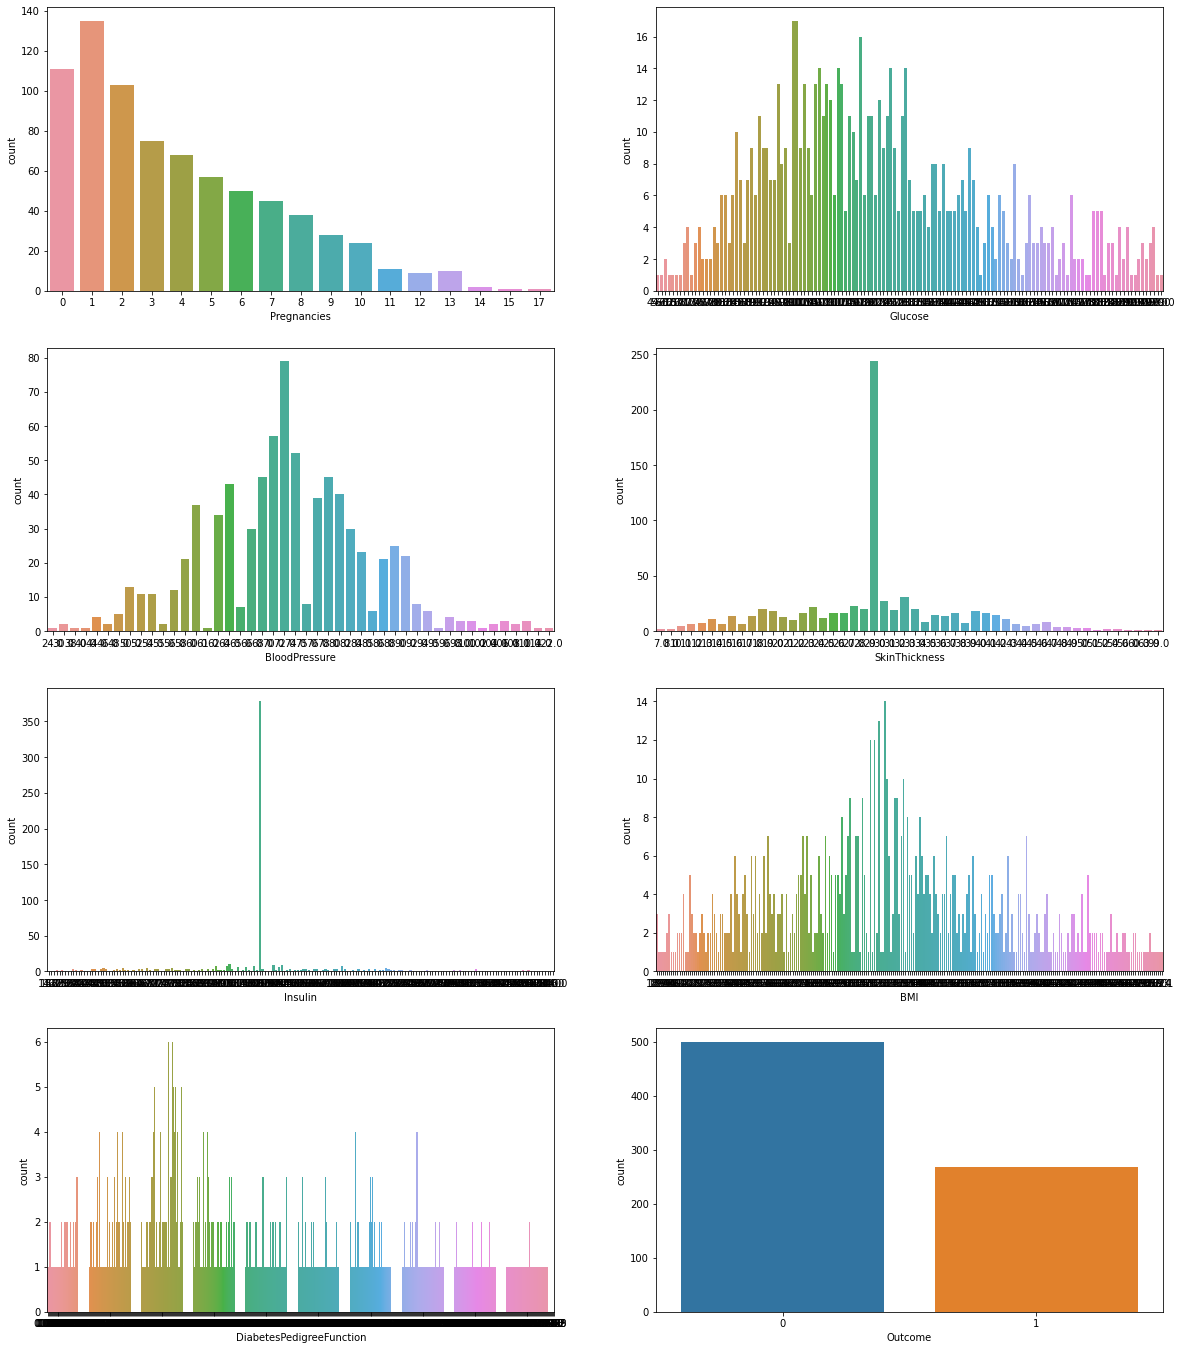

In [33]:
plt.figure(figsize=(20,24))
plt.subplot(421)
sns.countplot(x=df.Pregnancies)
plt.subplot(422)
sns.countplot(x=df.Glucose)
plt.subplot(423)
sns.countplot(x=df.BloodPressure)
plt.subplot(424)
sns.countplot(x=df.SkinThickness)
plt.subplot(425)
sns.countplot(x=df.Insulin)
plt.subplot(426)
sns.countplot(x=df.BMI)
plt.subplot(427)
sns.countplot(x=df.DiabetesPedigreeFunction)
plt.subplot(428)
sns.countplot(x=df.Outcome)

##### Check the balance of the data by plotting the count of outcomes by their value. Describe your findings and plan future course of action.

In [34]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [35]:
df['Outcome'].value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

##### there are 500 negative or 0 and 268 positive or 1 instances hence we can say that the given dataset it imbalanced

##### In order to balance the data, we will add weights to each class.

### Ploting scatter charts between the pair of variables to understand the relationships

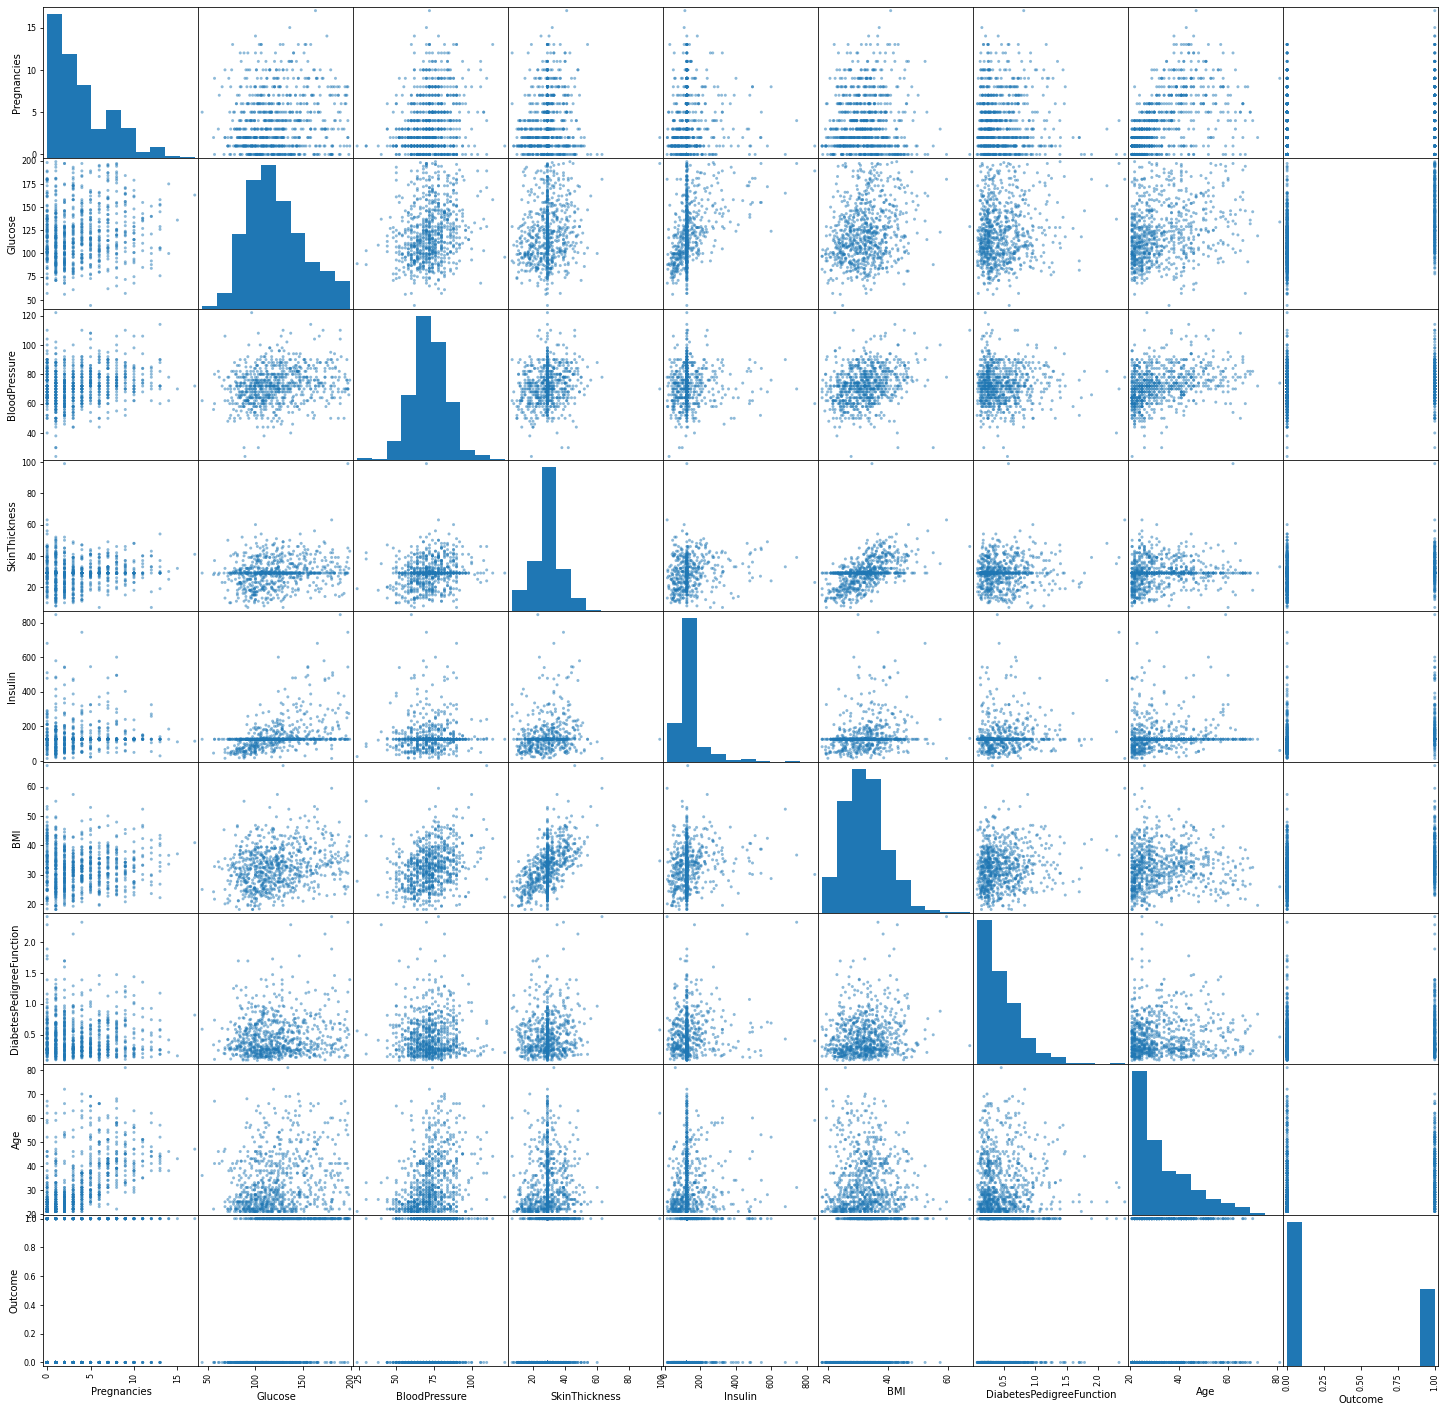

In [36]:
from pandas.plotting import scatter_matrix
scatter = scatter_matrix(df,figsize=(25, 25))

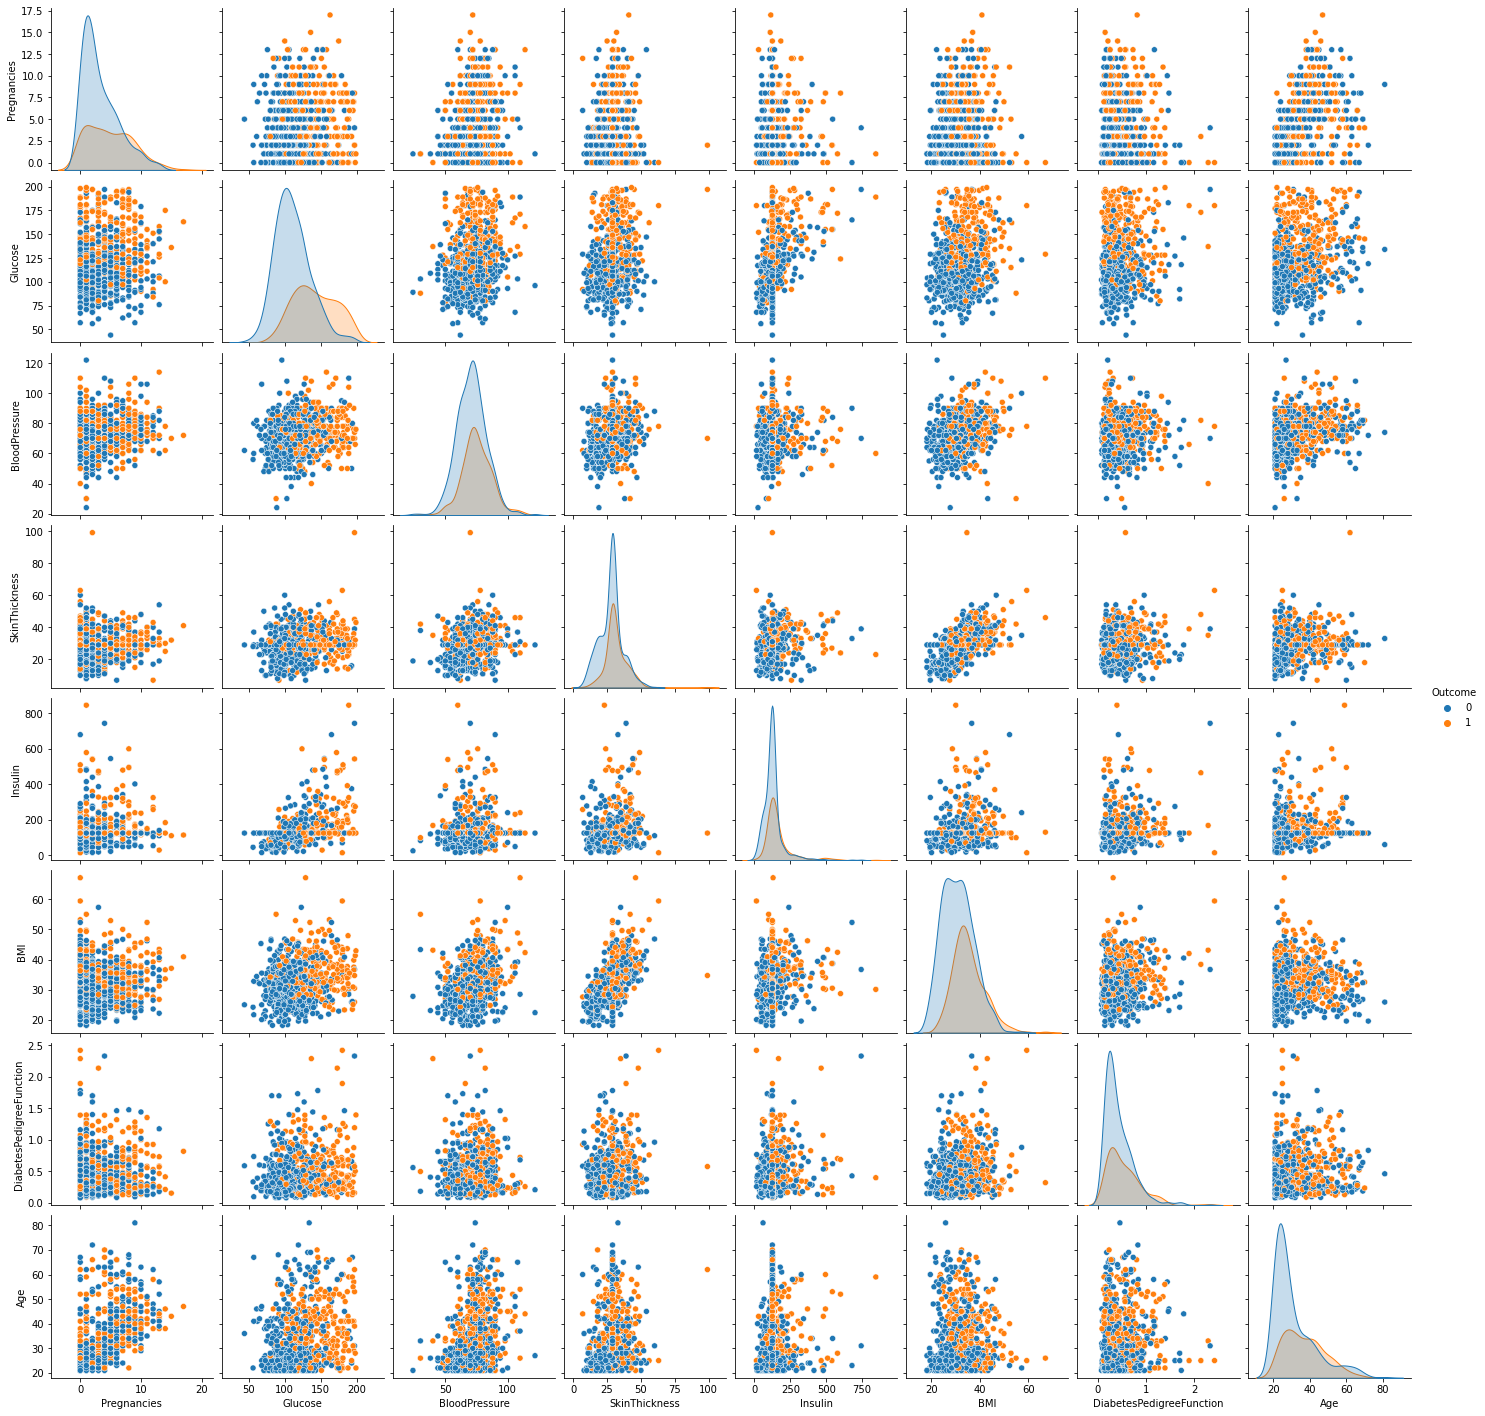

In [37]:
sns.pairplot(df, hue = 'Outcome')

### Ploting heatmap for performing correlation analysis 
Here, 
Value 1 represent the max correlation between variables
Value 0 represent the no correlation between variables

In [38]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


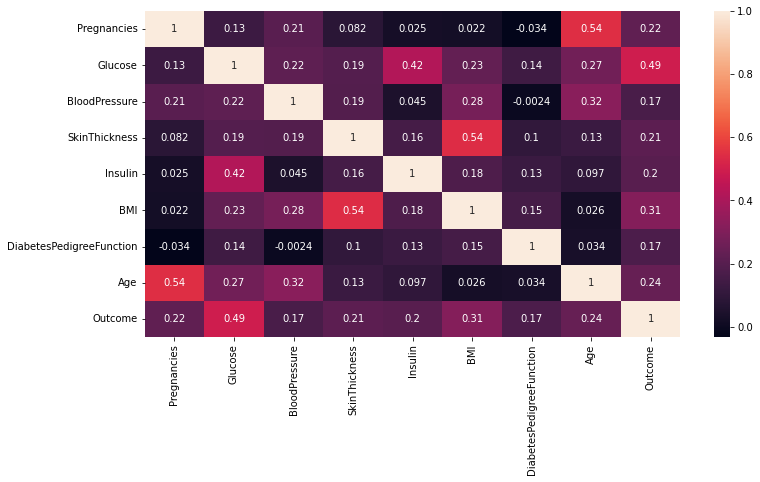

In [39]:
plt.figure(figsize = (12, 6))
heatmap = sns.heatmap(df.corr(), annot=True)

## Data Modeling

##### Splitting the data into feature and Target variable

In [71]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1:]
x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6    148.0           72.0           35.0    125.0  33.6   
 1              1     85.0           66.0           29.0    125.0  26.6   
 2              8    183.0           64.0           29.0    125.0  23.3   
 3              1     89.0           66.0           23.0     94.0  28.1   
 4              0    137.0           40.0           35.0    168.0  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10    101.0           76.0           48.0    180.0  32.9   
 764            2    122.0           70.0           27.0    125.0  36.8   
 765            5    121.0           72.0           23.0    112.0  26.2   
 766            1    126.0           60.0           29.0    125.0  30.1   
 767            1     93.0           70.0           31.0    125.0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

##### Performing Train Test split

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.2)
x_train,x_test,y_train,y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 120            0    162.0           76.0           56.0    100.0  53.2   
 172            2     87.0           72.0           23.0    125.0  28.9   
 307            0    137.0           68.0           14.0    148.0  24.8   
 7             10    115.0           72.0           29.0    125.0  35.3   
 448            0    104.0           64.0           37.0     64.0  33.6   
 ..           ...      ...            ...            ...      ...   ...   
 369            1    133.0          102.0           28.0    140.0  32.8   
 320            4    129.0           60.0           12.0    231.0  27.5   
 527            3    116.0           74.0           15.0    105.0  26.3   
 125            1     88.0           30.0           42.0     99.0  55.0   
 265            5     96.0           74.0           18.0     67.0  33.6   
 
      DiabetesPedigreeFunction  Age  
 120                     0.759   25  
 172                  

### Logistic Regression Model

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [74]:
print('Accuracy on Train Data = ',lr_model.score(x_train,y_train))
print('Accuracy on Test Data = ',lr_model.score(x_test,y_test))
print('Confusion matrix :\n ',confusion_matrix(y,lr_model.predict(x)))
print('Classification report : \n',classification_report(y,lr_model.predict(x)))

Accuracy on Train Data =  0.7833876221498371
Accuracy on Test Data =  0.7272727272727273
Confusion matrix :
  [[445  55]
 [120 148]]
Classification report : 
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       500
           1       0.73      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.76       768



### Logistic Regression Model ( With Added weights => 'Balanced' )

In [75]:
lrw_model=LogisticRegression(class_weight='balanced')
lrw_model.fit(x_train,y_train)
print('Accuracy on Train Data = ',lrw_model.score(x_train,y_train))
print('Accuracy on Test Data = ',lrw_model.score(x_test,y_test))
print('Confusion matrix : \n',confusion_matrix(y,lrw_model.predict(x)))
print('Classification report : \n',classification_report(y,lrw_model.predict(x)))

Accuracy on Train Data =  0.747557003257329
Accuracy on Test Data =  0.7207792207792207
Confusion matrix : 
 [[377 123]
 [ 75 193]]
Classification report : 
               precision    recall  f1-score   support

           0       0.83      0.75      0.79       500
           1       0.61      0.72      0.66       268

    accuracy                           0.74       768
   macro avg       0.72      0.74      0.73       768
weighted avg       0.76      0.74      0.75       768



### Logistic Regression Model ( With Manual weights  )

In [76]:
# for class 0, weigth = 1
# for class 1, weight = occurances of class 0 / occurances of class 1 = 500/267 = 1.872
lrwm_model=LogisticRegression(class_weight={0:1,1:1.872})
lrwm_model.fit(x_train,y_train)
print('Accuracy on Train Data = ',lrwm_model.score(x_train,y_train))
print('Accuracy on Test Data = ',lrwm_model.score(x_test,y_test))
print('Confusion matrix : \n',confusion_matrix(y,lrwm_model.predict(x)))
print('Classification report : \n',classification_report(y,lrwm_model.predict(x)))

Accuracy on Train Data =  0.747557003257329
Accuracy on Test Data =  0.7467532467532467
Confusion matrix : 
 [[381 119]
 [ 75 193]]
Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       500
           1       0.62      0.72      0.67       268

    accuracy                           0.75       768
   macro avg       0.73      0.74      0.73       768
weighted avg       0.76      0.75      0.75       768



### Decision Tree Model

In [77]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [78]:
print('Accuracy on Train Data = ',dt_model.score(x_train,y_train))
print('Accuracy on Test Data = ',dt_model.score(x_test,y_test))
print('Confusion matrix : \n',confusion_matrix(y,dt_model.predict(x)))
print('Classification report : \n',classification_report(y,dt_model.predict(x)))

Accuracy on Train Data =  1.0
Accuracy on Test Data =  0.7402597402597403
Confusion matrix : 
 [[483  17]
 [ 23 245]]
Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       500
           1       0.94      0.91      0.92       268

    accuracy                           0.95       768
   macro avg       0.94      0.94      0.94       768
weighted avg       0.95      0.95      0.95       768



### Random Forest Model

In [79]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
print('Accuracy on Train Data = ',rf_model.score(x_train,y_train))
print('Accuracy on Test Data = ',rf_model.score(x_test,y_test))
print('Confusion matrix : \n',confusion_matrix(y,rf_model.predict(x)))
print('Classification report : \n',classification_report(y,rf_model.predict(x)))

Accuracy on Train Data =  1.0
Accuracy on Test Data =  0.7077922077922078
Confusion matrix : 
 [[484  16]
 [ 29 239]]
Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96       500
           1       0.94      0.89      0.91       268

    accuracy                           0.94       768
   macro avg       0.94      0.93      0.93       768
weighted avg       0.94      0.94      0.94       768



### SVC Model

In [83]:
from sklearn.svm import SVC
svc_model=SVC(probability=True)
svc_model.fit(x_train,y_train)

SVC(probability=True)

In [84]:
print('Accuracy on Train Data = ',svc_model.score(x_train,y_train))
print('Accuracy on Test Data = ',svc_model.score(x_test,y_test))
print('Confusion matrix : \n',confusion_matrix(y,svc_model.predict(x)))
print('Classification report : \n',classification_report(y,svc_model.predict(x)))

Accuracy on Train Data =  0.7785016286644951
Accuracy on Test Data =  0.6948051948051948
Confusion matrix : 
 [[457  43]
 [140 128]]
Classification report : 
               precision    recall  f1-score   support

           0       0.77      0.91      0.83       500
           1       0.75      0.48      0.58       268

    accuracy                           0.76       768
   macro avg       0.76      0.70      0.71       768
weighted avg       0.76      0.76      0.75       768



### KNN Model

In [85]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [86]:
print('Accuracy on Train Data = ',knn_model.score(x_train,y_train))
print('Accuracy on Test Data = ',knn_model.score(x_test,y_test))
print('Confusion matrix : \n',confusion_matrix(y,knn_model.predict(x)))
print('Classification report : \n',classification_report(y,knn_model.predict(x)))

Accuracy on Train Data =  0.8127035830618893
Accuracy on Test Data =  0.6883116883116883
Confusion matrix : 
 [[433  67]
 [ 96 172]]
Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.87      0.84       500
           1       0.72      0.64      0.68       268

    accuracy                           0.79       768
   macro avg       0.77      0.75      0.76       768
weighted avg       0.78      0.79      0.78       768



### AUC and ROC Curve fo various Model

In [87]:
from sklearn.metrics import roc_auc_score,roc_curve
# getting prediction probalities for different models
lr_probs=lr_model.predict_proba(x)
lrw_probs=lrw_model.predict_proba(x)
lrwm_probs=lrwm_model.predict_proba(x)
dt_probs=dt_model.predict_proba(x)
rf_probs=rf_model.predict_proba(x)
svc_probs=svc_model.predict_proba(x)
knn_probs=knn_model.predict_proba(x)
# We need pred probs only for outcome = 1
lr_probs=lr_probs[:,1]
lrw_probs=lrw_probs[:,1]
lrwm_probs=lrwm_probs[:,1]
dt_probs=dt_probs[:,1]
rf_probs=rf_probs[:,1]
svc_probs=svc_probs[:,1]
knn_probs=knn_probs[:,1]


In [88]:
# getting AUC score
auc_lr=roc_auc_score(y,lr_probs)
auc_lrw=roc_auc_score(y,lrw_probs)
auc_lrwm=roc_auc_score(y,lrwm_probs)
auc_dt=roc_auc_score(y,dt_probs)
auc_rf=roc_auc_score(y,rf_probs)
auc_svc=roc_auc_score(y,svc_probs)
auc_knn=roc_auc_score(y,knn_probs)
print('\n AUC for different models : \n')
print('Logistic regression model without weight AUC : ',auc_lr)
print('Logistic Regression model with Balanced weight AUC : ',auc_lrw)
print('Logistic Regression model with manual weight AUC : ',auc_lrwm)
print('Decision Tree model AUC : ',auc_dt)
print('Random Forest model AUC : ',auc_rf)
print('SVC model AUC : ',auc_svc)
print('KNN model AUC : ',auc_knn)


 AUC for different models : 

Logistic regression model without weight AUC :  0.8374477611940299
Logistic Regression model with Balanced weight AUC :  0.8353358208955224
Logistic Regression model with manual weight AUC :  0.8385820895522388
Decision Tree model AUC :  0.940089552238806
Random Forest model AUC :  0.9838768656716419
SVC model AUC :  0.8259701492537312
KNN model AUC :  0.8590186567164179


In [89]:
# calculating values for ROC curve
lr_fpr, lr_tpr, lr_thresholds = roc_curve(y, lr_probs)
lrw_fpr, lrw_tpr, lrw_thresholds = roc_curve(y, lrw_probs)
lrwm_fpr, lrwm_tpr, lrwm_thresholds = roc_curve(y, lrwm_probs)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y, dt_probs)
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y, rf_probs)
svc_fpr, svc_tpr, svc_thresholds = roc_curve(y, svc_probs)
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y, knn_probs)


ROC curves for various models 



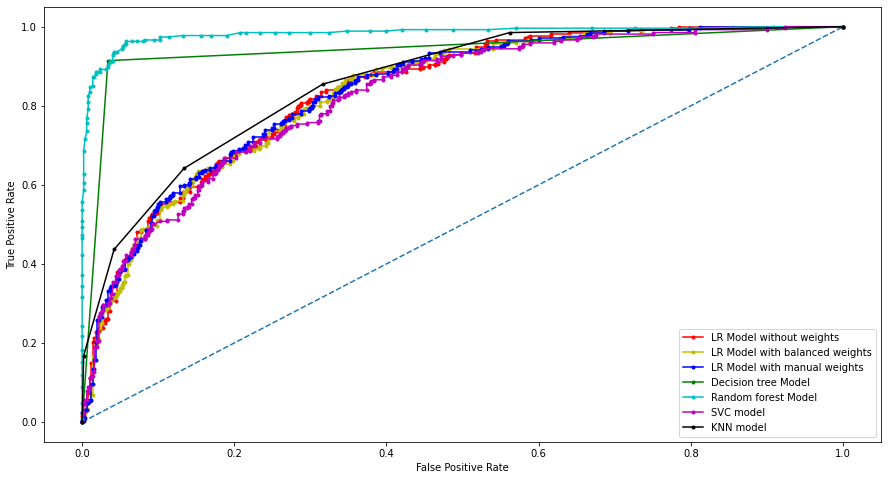

In [90]:
# plotting for random predictor model
print('\nROC curves for various models \n')
plt.figure(figsize=(15,8))
plt.plot([0, 1], [0, 1], linestyle='--')
# plotting ROC curve for various models
plt.plot(lr_fpr, lr_tpr, marker='.',c='r',label='LR Model without weights')
plt.plot(lrw_fpr, lrw_tpr, marker='.',c='y',label='LR Model with balanced weights')
plt.plot(lrwm_fpr, lrwm_tpr, marker='.',c='b',label='LR Model with manual weights')
plt.plot(dt_fpr, dt_tpr, marker='.',c='g',label='Decision tree Model')
plt.plot(rf_fpr, rf_tpr, marker='.',c='c',label='Random forest Model')
plt.plot(svc_fpr, svc_tpr, marker='.',c='m',label='SVC model')
plt.plot(knn_fpr, knn_tpr, marker='.',c='k',label='KNN model')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

### Calculating Sensitivity and Specificity for various models

In [91]:
def get_confusion_matrix_values(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

lr_TP, lr_FP, lr_FN, lr_TN = get_confusion_matrix_values(y, lr_model.predict(x))
lrw_TP, lrw_FP, lrw_FN, lrw_TN = get_confusion_matrix_values(y, lrw_model.predict(x))
lrwm_TP, lrwm_FP, lrwm_FN, lrwm_TN = get_confusion_matrix_values(y, lrwm_model.predict(x))
dt_TP, dt_FP, dt_FN, dt_TN = get_confusion_matrix_values(y, dt_model.predict(x))
rf_TP, rf_FP, rf_FN, rf_TN = get_confusion_matrix_values(y, rf_model.predict(x))
svc_TP, svc_FP, svc_FN, svc_TN = get_confusion_matrix_values(y, svc_model.predict(x))
knn_TP, knn_FP, knn_FN, knn_TN = get_confusion_matrix_values(y, knn_model.predict(x))

In [92]:
print('SENSITIVITY: \n')
print('Sensitivity of Logistic Regression model : ',(lr_TP/(lr_TP+lr_FN)))
print('Sensitivity of Logistic Regression model with balanced weight : ',(lrw_TP/(lrw_TP+lrw_FN)))
print('Sensitivity of Logistic regression model with manual weight : ',(lrwm_TP/(lrwm_TP+lrwm_FN)))
print('Sensitivity of Decision Tree model : ',(dt_TP/(dt_TP+dt_FN)))
print('Sensitivity of Random forest model : ',(rf_TP/(rf_TP+rf_FN)))
print('Sensitivity of SVC model : ',(svc_TP/(svc_TP+svc_FN)))
print('Sensitivity of KNN model : ',(knn_TP/(knn_TP+knn_FN)))

SENSITIVITY: 

Sensitivity of Logistic Regression model :  0.7876106194690266
Sensitivity of Logistic Regression model with balanced weight :  0.834070796460177
Sensitivity of Logistic regression model with manual weight :  0.8355263157894737
Sensitivity of Decision Tree model :  0.9545454545454546
Sensitivity of Random forest model :  0.9434697855750487
Sensitivity of SVC model :  0.7654941373534339
Sensitivity of KNN model :  0.8185255198487713


In [93]:
print('\nSPECIFICITY: \n')
print('Specificity of Logistic Regression model : ',(lr_TN/(lr_TN+lr_FP)))
print('Specificity of Logistic Regression model with balanced weight : ',(lrw_TN/(lrw_TN+lrw_FP)))
print('Specificity of Logistic regression model with manual weight : ',(lrwm_TN/(lrwm_TN+lrwm_FP)))
print('Specificity of Decision Tree model : ',(dt_TN/(dt_TN+dt_FP)))
print('Specificity of Random forest model : ',(rf_TN/(rf_TN+rf_FP)))
print('Specificity of SVC model : ',(svc_TN/(svc_TN+svc_FP)))
print('Specificity of KNN model : ',(knn_TN/(knn_TN+knn_FP)))


SPECIFICITY: 

Specificity of Logistic Regression model :  0.729064039408867
Specificity of Logistic Regression model with balanced weight :  0.6107594936708861
Specificity of Logistic regression model with manual weight :  0.6185897435897436
Specificity of Decision Tree model :  0.9351145038167938
Specificity of Random forest model :  0.9372549019607843
Specificity of SVC model :  0.7485380116959064
Specificity of KNN model :  0.7196652719665272


### Various models are analysed and compared using different criterias and below are the findings

### Based on accuracy of models on test data:

Decision Tree model has highest accuracy of almost 74%. KNN model has an accuracy of 69% and so does Logistic Regression model.

### Based on ROC curve and AUC:

Random Forest model shows best results followed by Decision Tree model, KNN model is far behind.

### Based on Sensitivity and Specificity:¶

Decision Tree model has best sensitivity rate (95.45%) closely followed by Random forest (94.34%) while KNN model has a rate of 82.78%.

Specificity of Random Forest model is highest (93.72%) followed by Decision Tree model (93.51%). KNN model falls behind these two with a rate of 71.96%.

In this case we are building a model for disease detection and that's why we need to strictly minimize the number of False Negative hence we need maximum sensitivity in our model and based on this criteria we can choose Decision Tree model. The Random Forest model is performing Slightly better than any other model in all aspects except sensitivity, though it is very close to the top. Random Forest model can also be considered as it has almost equal sensitivity as Decision Tree model and far better specificity hence can reduce cost by reducing number of false positives
